In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Rule 30 MIPT
Asites=1, Bsites=120:200, p=0.4:0.001:0.6, n1-n5


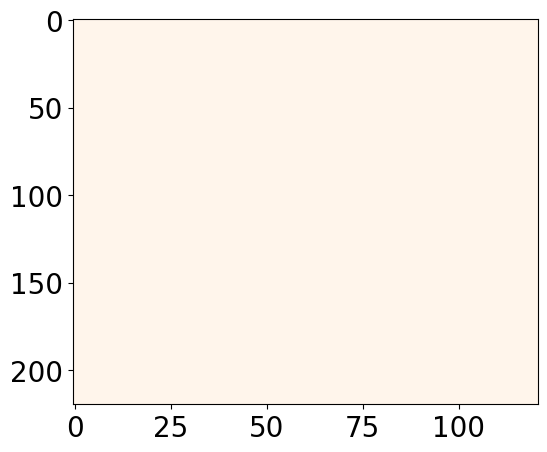

In [32]:
file_idx = 1
# file_name = "../data/240323/240323_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240323/240323_n%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_0_scanx.csv',skiprows=1)
# nmeas_l = np.loadtxt(file_name+'_0_scany.csv',skiprows=1)
nmeas_l = np.arange(220)
pertb_l = np.loadtxt(file_name+'_0_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_0_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr[0,:,:],aspect="auto",cmap="Oranges")
# for pertb_idx in range(0,50,5):
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])

In [34]:
np.max(S_ave_arr[:,:,:])

0.01

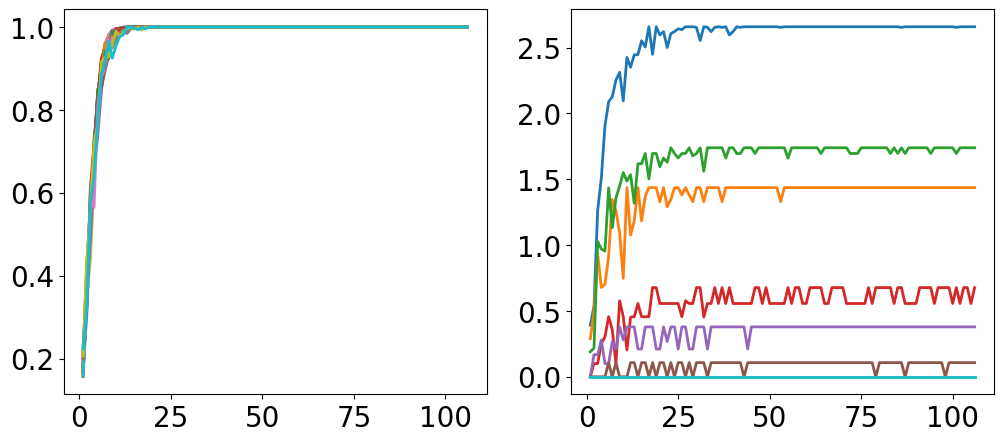

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1] / S_ave_arr[pertb_idx,-1,-1])
plt.subplot(1,2,2)
for pertb_idx in range(40,60,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1])

# plt.xlim([0,25])

#### Rule 30 MIPT
Asites=1-4, Bsites=100, p=0:0.01:0.4, 1-4

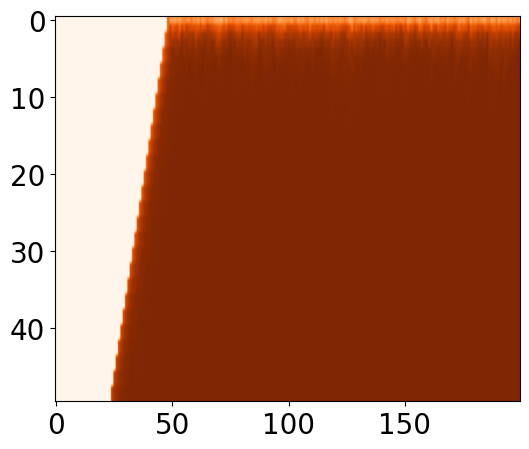

In [70]:
file_idx = 1
file_name = "../data/240323/240323_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
# nmeas_l = np.arange(220)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr[1,:,:],aspect="auto",cmap="Oranges")

(0.0, 10.0)

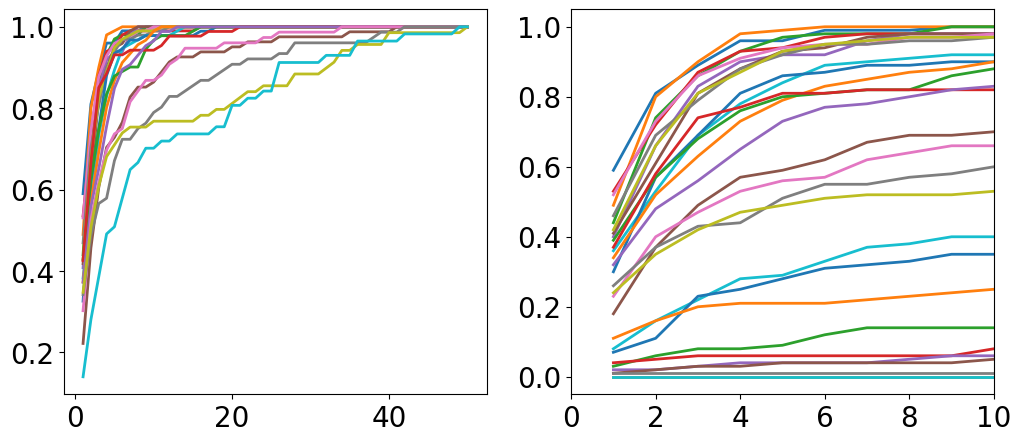

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,20,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1] / S_ave_arr[pertb_idx,-1,-1])

# plt.xlim([0,10])
plt.subplot(1,2,2)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1])

plt.xlim([0,10])

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_39430/3969306384.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / max(S_ave_arr[pertb_idx,:]))


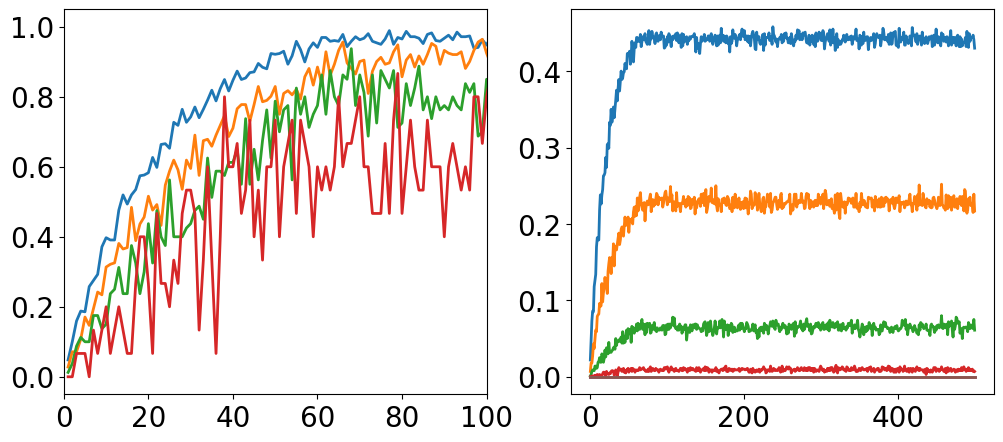

In [130]:
file_idx = 9
file_name = "../data/240323/240323_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,6,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / max(S_ave_arr[pertb_idx,:]))

plt.xlim([0,100])
plt.subplot(1,2,2)
for pertb_idx in range(0,6,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])

# plt.xlim([0,10])

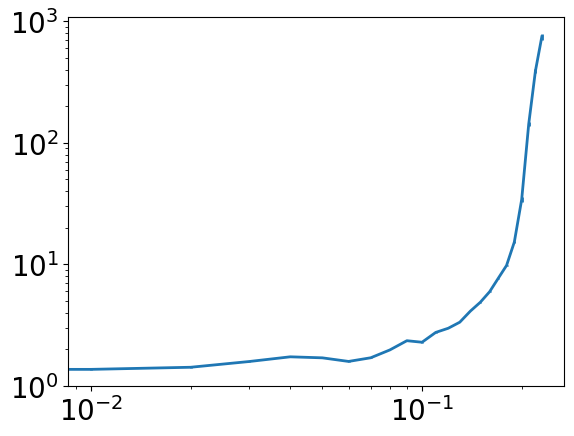

In [128]:
def fit_exp(x,x0):
    return 1-np.exp(-x/x0)

pertb_upper_idx = 24
meas0_l = np.zeros(pertb_upper_idx)
meas0_std_l = np.zeros(pertb_upper_idx)
for pertb_idx in range(0,pertb_upper_idx,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:] / max(S_ave_arr[pertb_idx,:]),p0=(2))
    meas0_l[pertb_idx] = popt[0]
    meas0_std_l[pertb_idx] = np.sqrt(pcov[0])

plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
plt.xscale('log')
plt.yscale('log')

In [107]:
popt, pcov = curve_fit(fit_exp, nmeas_l[0:10], S_ave_arr[0,0:10] / max(S_ave_arr[0,:]),p0=(2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


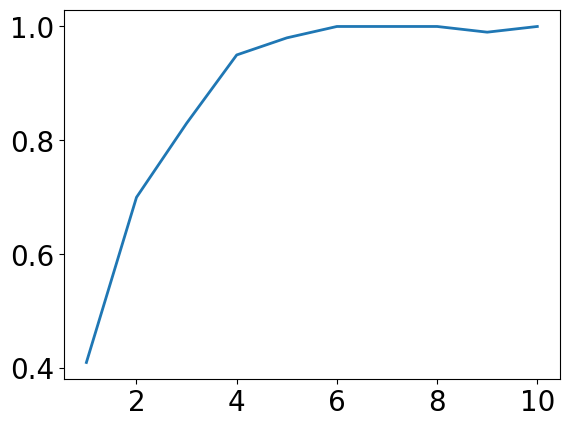

In [108]:
plt.plot(nmeas_l[0:10], S_ave_arr[0,0:10] / max(S_ave_arr[0,:]))